<a href="https://colab.research.google.com/github/samuelvalenciac/Ciencias_datos/blob/main/Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Parcial de Introducción a las ciencias de datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Producto': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Ventas': [120, 340, 290, 410, 150, 380],
    'Costo': [80, 200, 180, 260, 90, 240],
    'Categoria': ['Tecnología', 'Hogar', 'Tecnología', 'Hogar', 'Oficina', 'Tecnología'],
    'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero', 'Marzo', 'Marzo']
}

df = pd.DataFrame(data)

In [2]:
# Numpy
# 1. Vectores y operaciones

ventas_array = np.array(df['Ventas'])

# Promedio - mean(): Representa el número central sumando todos los datos y diviendolos por la cantidad total de datos ingresados.
promedio = np.mean(ventas_array)

# Valor máximo - max(): Analiza todo los datos en el arreglo (array) y elige el número más grande en los datos.
maximo = np.max(ventas_array)

# Valor mínimo - min(): Analiza todos los datos en el arreglo (array) y elige el número más pequeño en los datos.
minimo = np.min(ventas_array)

print(f"Promedio: {promedio}")
print(f"Valor Máximo: {maximo}")
print(f"Valor Mínimo: {minimo}")

Promedio: 281.6666666666667
Valor Máximo: 410
Valor Mínimo: 120


In [7]:
# 2. Condiciones

# Condición: 1 si > 300, 0 si no
ventas_if = np.where(ventas_array > 300, 1, 0)

print("Ventas originales: ", ventas_array)
print("Resultado binario: ", ventas_if)

Ventas originales:  [120 340 290 410 150 380]
Resultado binario:  [0 1 0 1 0 1]


In [9]:
# Pandas

# 3. Columnas calculadas

# Agregar una columna "Ganancias" como Ventas - Costo
df['Ganancia'] = df['Ventas'] - df['Costo']

# Productos con ganancia mayor a 100
productos_100 = df[df['Ganancia'] > 100]

print("Productos con ganancia mayor a 100:")
productos_100

Productos con ganancia mayor a 100:


,Producto,Ventas,Costo,Categoria,Mes,Ganancia
1,B,340,200,Hogar,Enero,140
2,C,290,180,Tecnología,Febrero,110
3,D,410,260,Hogar,Febrero,150
5,F,380,240,Tecnología,Marzo,140


In [12]:
# 4. Filtros y condiciones

# Tecnología > 300
filtro = df[(df['Categoria'] == 'Tecnología') & (df['Ventas'] > 300)]

# Mostrar 3 columnas
columnas = filtro[['Producto', 'Ventas', 'Ganancia']]

print("Productos de tecnología con ventas mayores a 300:")
columnas

Productos de tecnología con ventas mayores a 300:


,Producto,Ventas,Ganancia
5,F,380,140


In [14]:
# 5. Agrupaciones

# Agrupar por "Mes" y calcular total de Ventas y promedio de Ganancia
grupo_mes = df.groupby('Mes').agg({
    'Ventas': 'sum',
    'Ganancia': 'mean'
})

# Suma - sum(): Suma todos los valores existentes en el grupo, lo que serviría para ver el total de productos vendidos y dinero recibido en el mes.
# Promedio - mean(): Promedia según los valores asignados al grupo (suma todos y los divide por la cantidad de datos); sirve para saber cuánta es la ganancia media por día.

print(grupo_mes)

         Ventas  Ganancia
Mes                      
Enero       460      90.0
Febrero     700     130.0
Marzo       530     100.0


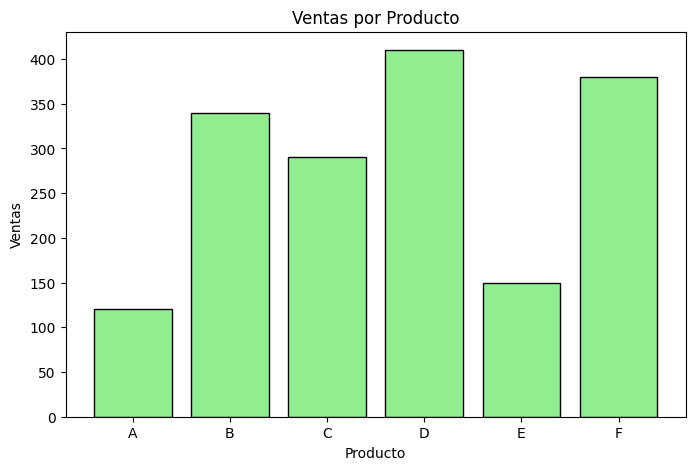

In [17]:
# Matplotlib

# 6. Gráfico básico

# Gráfico de barras Ventas vs Producto
plt.figure(figsize=(8, 5))
plt.bar(df['Producto'], df['Ventas'], color='lightgreen', edgecolor='black')

plt.title('Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()

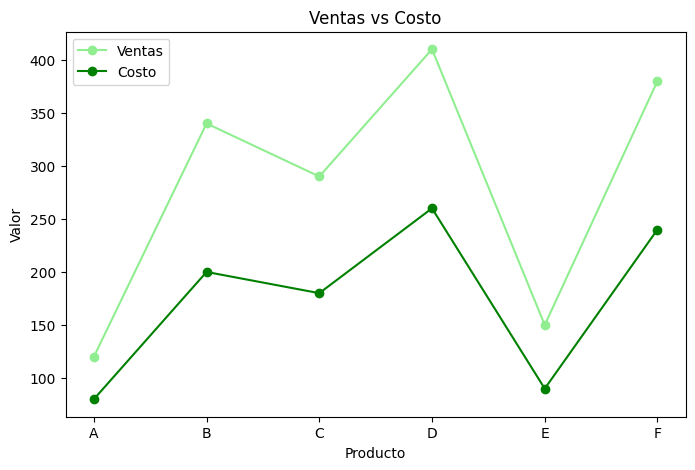

In [21]:
# 7. Gráfico comparativo

# Gráfico de líneas Ventas vs Costo por producto
plt.figure(figsize=(8, 5))
plt.plot(df['Producto'], df['Ventas'], label='Ventas', marker='o', color='lightgreen')
plt.plot(df['Producto'], df['Costo'], label='Costo', marker='o', color='green')

plt.title('Ventas vs Costo')
plt.xlabel('Producto')
plt.ylabel('Valor')
plt.legend()
plt.show()

# TENDENCIA:
# Con el gráfico de Ventas vs Costo hay dos observaciones:
# 1. Siguen la misma tendencia, cuando una línea sube o baja la otra tiende a hacer lo mismo por lo que tienen una relación directamente proporcional.
# 2. La línea de ventas siempre está por encima de la línea de costo, esto demuestra una ganancia positiva donde siempre se vende más de lo que cuesta un producto.

/tmp/ipython-input-2362794123.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='Ventas', data=df, palette='Greens')


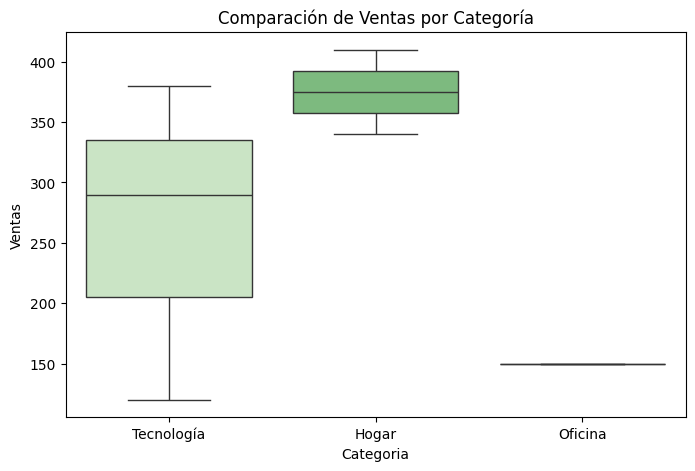

In [29]:
# Seaborn

# 8. Gráfico estadístico

# Boxplot de ventas por categorías
plt.figure(figsize=(8, 5))
sns.boxplot(x='Categoria', y='Ventas', data=df, palette='Greens')

plt.title('Comparación de Ventas por Categoría')
plt.show()

# Variabilidad en ventas
# La categoría con mayor visibilidad en la gráfica es "Tecnología", lo cual puede ser evidenciado en en la caja y los bigotes de esta, donde sus valores mínimos y máximos son los más alejados entre ellos al comparar con las otras categorías desde 120 hasta 380, respectivamente; este comportamiento puede deberse a que tiene tiene la mayor cantidad de datos con 3 valores, mientras las otras tienen 2 y 1.

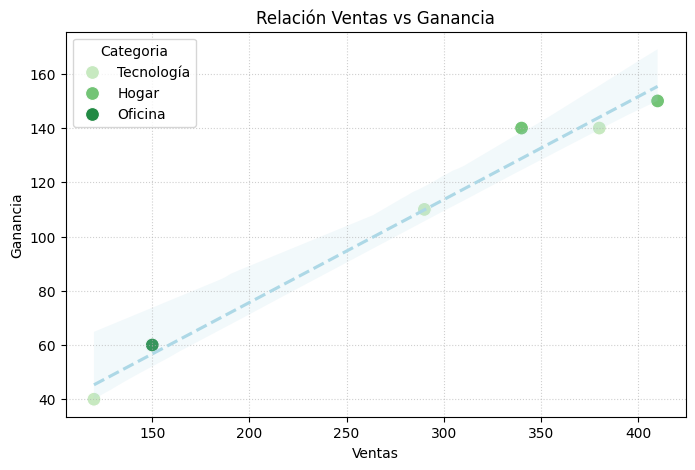

In [40]:
# 9. Relación entre variables

# Scatterplot entre Ventas y Ganancias, diferenciada por Categoría
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Ventas', y='Ganancia', hue='Categoria', data=df, s=100, palette='Greens')
sns.regplot(x='Ventas', y='Ganancia', data=df, scatter=False, color='lightblue', line_kws={'linestyle':'--'})

plt.title('Relación Ventas vs Ganancia')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [44]:
# Análisis final

# 10. Integración

# a. Producto más rentable
producto_top = df.nlargest(1, 'Ganancia')

print("El producto más rentable es:")
print(producto_top[['Producto', 'Ganancia']])

# b. Categoría con mayor ganancia
ganancia_total_cat = df.groupby('Categoria')['Ganancia'].sum()

print("Ganancia total por categoría:\n", ganancia_total_cat)

# RESPUESTAS:
# a) El producto más rentable es el 'D' por su ganancia de 150 (evidenciado en los punto 3, 6 y 7).
# b) Hay dos categorías que tienen la mayor ganancia total, siendo "Tecnología" y "Hogar" con un total de 290 cada una.
# c) Según los datos, se decide:
# 1. Enfocarse en las categorías de "Hogar" y "Tecnología", la primera porque con pocas ventas hace la misma ganacia que la otra categoría y la segunda porque es la que tiene el mayor volúmen de ventas.
# 2. Revisar o eliminar la categoría de "Oficina" al traer muy pocas ganancias, los recursos se pueden destinar a especializarse en las categorías que den mayores ganancias.
# 3. Aumentar el stock y publicidad del producto "D" ya que es el más famoso y se puede sacar más oportunidades de venta.
# 4. Crear planes de organización e inventario para épocas con gran volúmen de ventas como Febrero. (Punto 5)
# 5. Sacar estrategias de venta, como mayor publicidad o promociones, para meses con pocas ventas como Enero. (Punto 5)

El producto más rentable es:
  Producto  Ganancia
3        D       150
Ganancia total por categoría:
 Categoria
Hogar         290
Oficina        60
Tecnología    290
Name: Ganancia, dtype: int64
